<a href="https://colab.research.google.com/github/danielecaliari/AML/blob/main/progetto_AML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
root_dir = "/content/drive/MyDrive/"
base_dir = root_dir + 'progetto_AML/' 

Mounted at /content/drive


In [ ]:
train = pd.read_csv( base_dir + 'train.tsv', sep='\t')
test = pd.read_csv( base_dir + 'test.tsv', sep='\t')

In [ ]:
train

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity
...,...,...,...,...,...,...,...,...
1482530,1482530,Free People Inspired Dress,2,Women/Dresses/Mid-Calf,Free People,20.0,1,"Lace, says size small but fits medium perfectl..."
1482531,1482531,Little mermaid handmade dress,2,Kids/Girls 2T-5T/Dresses,Disney,14.0,0,Little mermaid handmade dress never worn size 2t
1482532,1482532,21 day fix containers and eating plan,2,Sports & Outdoors/Exercise/Fitness accessories,NaN,12.0,0,"Used once or twice, still in great shape."
1482533,1482533,World markets lanterns,3,Home/Home Décor/Home Décor Accents,NaN,45.0,1,There is 2 of each one that you see! So 2 red ...


In [ ]:
test

#DATA ANALYSIS

In [ ]:
train.isnull().any()

train_id             False
name                 False
item_condition_id    False
category_name         True
brand_name            True
price                False
shipping             False
item_description      True
dtype: bool

In [ ]:
train.isnull().sum(axis=0)

train_id                  0
name                      0
item_condition_id         0
category_name          6327
brand_name           632682
price                     0
shipping                  0
item_description          4
dtype: int64

In [ ]:
#split category column in three different columns
def split_cat(text):
    try: return text.split("/")
    except: return ("No Label", "No Label", "No Label") 

In [ ]:
#train
train['main_category'], train['subcat_1'], train['subcat_2'] = zip(*train['category_name'].apply(lambda x: split_cat(x)))
train = train.drop('category_name', axis=1)
#test
test['main_category'], test['subcat_1'], test['subcat_2'] = zip(*test['category_name'].apply(lambda x: split_cat(x)))
test = test.drop('category_name', axis=1)

In [ ]:
#fill missing values train
train.brand_name.fillna(value = "Unknown", inplace = True)
train.item_description.fillna(value = "No description", inplace = True)
#fill missing values test
test.brand_name.fillna(value = "Unknown", inplace = True)
test.item_description.fillna(value = "No description", inplace = True)

In [ ]:
train

,train_id,name,item_condition_id,brand_name,price,shipping,item_description,main_category,subcat_1,subcat_2
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Unknown,10.0,1,No description yet,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,Unknown,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,Unknown,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces
...,...,...,...,...,...,...,...,...,...,...
1482530,1482530,Free People Inspired Dress,2,Free People,20.0,1,"Lace, says size small but fits medium perfectl...",Women,Dresses,Mid-Calf
1482531,1482531,Little mermaid handmade dress,2,Disney,14.0,0,Little mermaid handmade dress never worn size 2t,Kids,Girls 2T-5T,Dresses
1482532,1482532,21 day fix containers and eating plan,2,Unknown,12.0,0,"Used once or twice, still in great shape.",Sports & Outdoors,Exercise,Fitness accessories
1482533,1482533,World markets lanterns,3,Unknown,45.0,1,There is 2 of each one that you see! So 2 red ...,Home,Home Décor,Home Décor Accents


In [ ]:
#count of the categories
maincat_count = train['main_category'].value_counts()
subcat1_count = train['subcat_1'].value_counts()
subcat2_count = train['subcat_2'].value_counts()

maincat_count = pd.DataFrame({'name':maincat_count.index, 'count':maincat_count.values})
subcat1_count = pd.DataFrame({'name':subcat1_count.index, 'count':subcat1_count.values})
subcat2_count = pd.DataFrame({'name':subcat2_count.index, 'count':subcat2_count.values})

In [ ]:
#function to plot categories
def plot_counts(category, title):
  n = category['name'].head(10).unique().__len__()+1
  all_colors = list(plt.cm.colors.cnames.keys())
  random.seed(100)
  c = random.choices(all_colors, k=n)

  # Plot Bars
  plt.figure(figsize=(10,5), dpi= 80)
  plt.bar(category['name'].head(10), category['count'].head(10), color=c, width=.5)
  for i, val in enumerate(category['count'].head(10).values):
      plt.text(i, val, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

  # Decoration
  plt.gca().set_xticklabels(category['name'].head(10), rotation=60, horizontalalignment= 'right')
  plt.title(title, fontsize=22)
  plt.ylabel('# Products')
  plt.show()

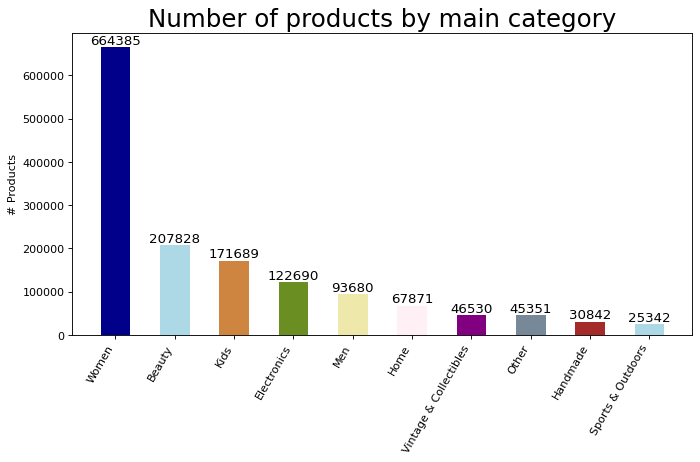

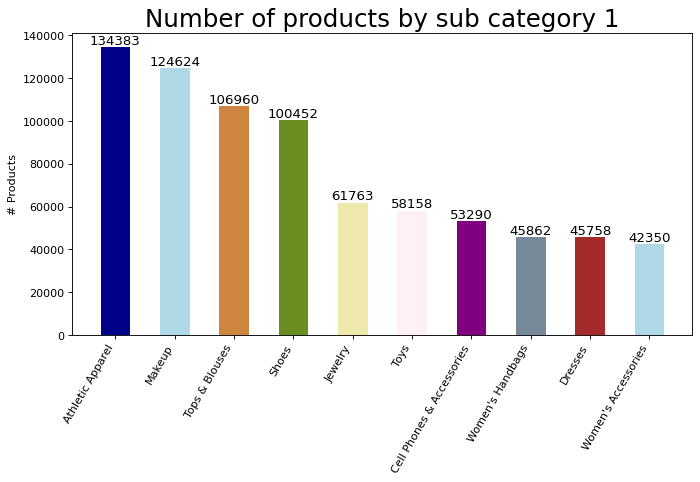

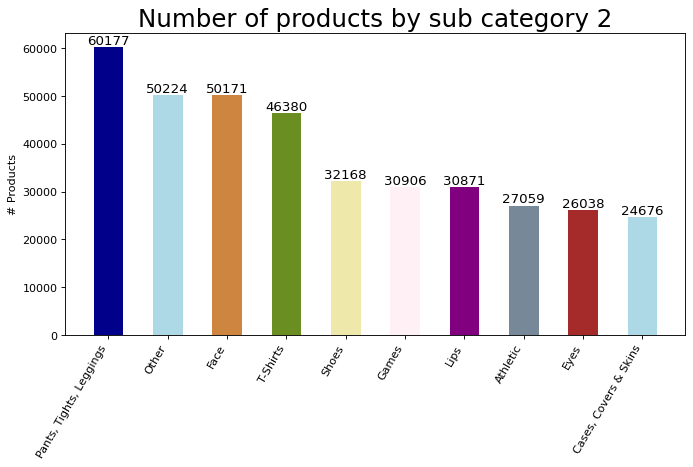

In [ ]:
plot_counts(maincat_count, "Number of products by main category")
plot_counts(subcat1_count, "Number of products by sub category 1")
plot_counts(subcat2_count, "Number of products by sub category 2")

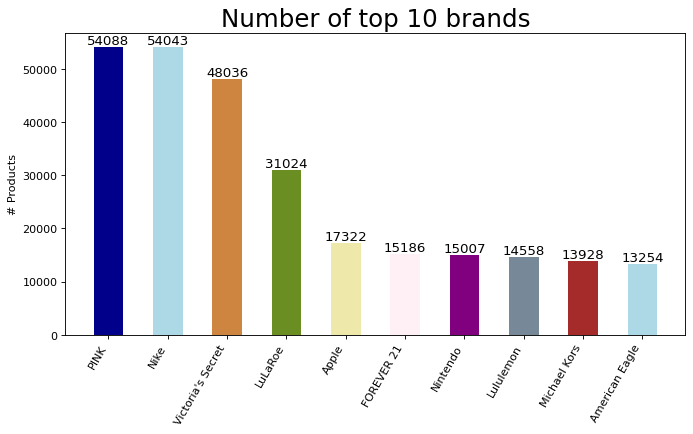

In [ ]:
#brand count
brand_count = train['brand_name'].value_counts()
#exclude the first row because is "Unknow" and we want to see only known brands
brand_count = pd.DataFrame({'name':brand_count.index, 'count':brand_count.values})[1:]
plot_counts(brand_count, "Number of top 10 brands")

In [ ]:
train['price'].describe()

count    1.482535e+06
mean     2.673752e+01
std      3.858607e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64

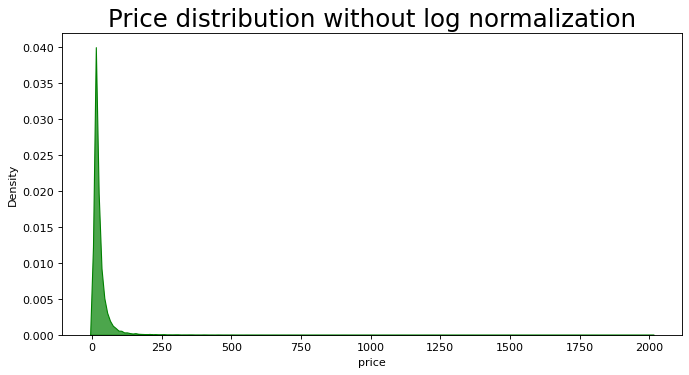

In [ ]:
# Draw Plot price feature
plt.figure(figsize=(10,5), dpi= 80)
sns.kdeplot(train['price'], shade=True, color="g", alpha=.7)

# Decoration
plt.title('Price distribution without log normalization', fontsize=22)
plt.show()

## da trasformare in un'altra distribuzine??

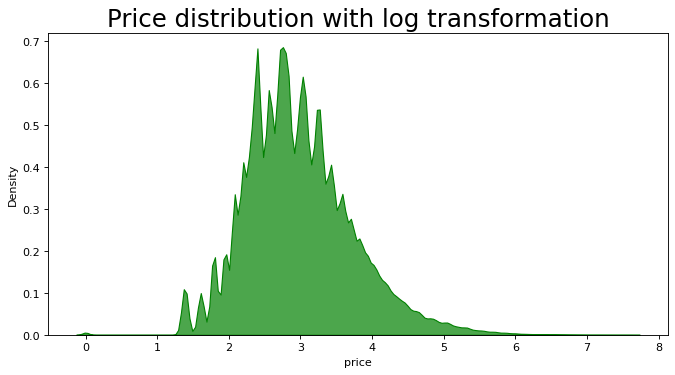

In [ ]:
# log transformation for the price
def log_price(price):
    return np.log1p(price) #changes

train['price'] = train['price'].apply(lambda x: log_price(x))

plt.figure(figsize=(10,5), dpi= 80)
sns.kdeplot(train['price'], shade=True, color="g", alpha=.7)
plt.title('Price distribution with log transformation', fontsize=22)
plt.show()

1    640549
3    432161
2    375479
4     31962
5      2384
Name: item_condition_id, dtype: int64


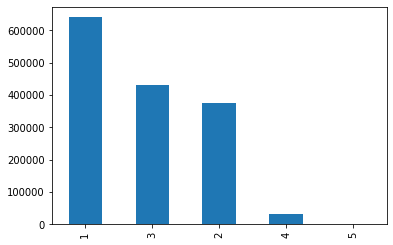

In [ ]:
# plot item_condition feature
# most items for sale are in good condition
print(train['item_condition_id'].value_counts())
train['item_condition_id'].value_counts().plot(kind='bar');

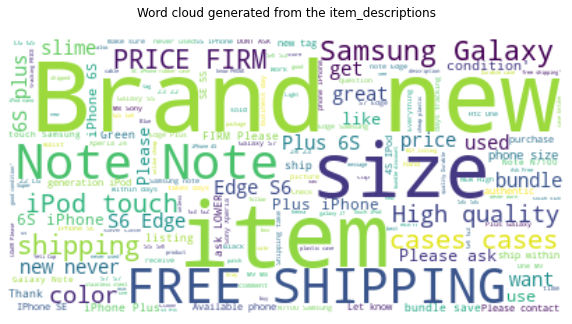

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
import nltk
from nltk.corpus import stopwords 

word_counter = Counter(train['item_description'])
most_common_words = word_counter.most_common(500)
stopwords = stopwords.words('english')
stopwords.extend(['rm'])
wordcloud = WordCloud(stopwords=stopwords,background_color="white").generate(str(most_common_words))

# Display the generated image:
plt.figure(figsize=(10,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word cloud generated from the item_descriptions\n")
plt.axis("off")
plt.show()

In [ ]:
# add column with wordcount of descriptions train
train['description_wc'] = [len(str(i).split()) for i in train['item_description']]
train
# add column with wordcount of descriptions test
test['description_wc'] = [len(str(i).split()) for i in test['item_description']]
test

,train_id,name,item_condition_id,brand_name,price,shipping,item_description,main_category,subcat_1,subcat_2,description_wc
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Unknown,2.397895,1,No description yet,Men,Tops,T-shirts,3
1,1,Razer BlackWidow Chroma Keyboard,3,Razer,3.970292,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts,36
2,2,AVA-VIV Blouse,1,Target,2.397895,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse,29
3,3,Leather Horse Statues,1,Unknown,3.583519,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents,32
4,4,24K GOLD plated rose,1,Unknown,3.806662,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces,5
...,...,...,...,...,...,...,...,...,...,...,...
1482530,1482530,Free People Inspired Dress,2,Free People,3.044522,1,"Lace, says size small but fits medium perfectl...",Women,Dresses,Mid-Calf,22
1482531,1482531,Little mermaid handmade dress,2,Disney,2.708050,0,Little mermaid handmade dress never worn size 2t,Kids,Girls 2T-5T,Dresses,8
1482532,1482532,21 day fix containers and eating plan,2,Unknown,2.564949,0,"Used once or twice, still in great shape.",Sports & Outdoors,Exercise,Fitness accessories,8
1482533,1482533,World markets lanterns,3,Unknown,3.828641,1,There is 2 of each one that you see! So 2 red ...,Home,Home Décor,Home Décor Accents,28


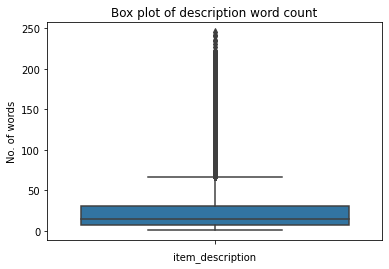

In [ ]:
# the majority descriptions contain approximately less than 40 words
sns.boxplot(y=train['description_wc'], orient='v')
plt.title("Box plot of description word count")
plt.xlabel("item_description")
plt.ylabel("No. of words")
plt.show()

Description pre-processing

In [ ]:
import re
# expanding english language contractions
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase


In [ ]:
def text_preprocessing(sentence):
  sent = decontracted(sentence)
  sent = sent.replace('\\r', ' ')
  sent = sent.replace('\\"', ' ')
  sent = sent.replace('\\n', ' ')
  sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
  sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
  return sent.lower().strip()

#train
train['item_description'] = train['item_description'].apply(lambda x: text_preprocessing(x))
train
#test
test['item_description'] = test['item_description'].apply(lambda x: text_preprocessing(x))
test

,train_id,name,item_condition_id,brand_name,price,shipping,item_description,main_category,subcat_1,subcat_2,description_wc
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Unknown,2.397895,1,description yet,Men,Tops,T-shirts,3
1,1,Razer BlackWidow Chroma Keyboard,3,Razer,3.970292,0,keyboard great condition works like came box p...,Electronics,Computers & Tablets,Components & Parts,36
2,2,AVA-VIV Blouse,1,Target,2.397895,1,adorable top hint lace key hole back pale pink...,Women,Tops & Blouses,Blouse,29
3,3,Leather Horse Statues,1,Unknown,3.583519,1,new tags leather horses retail stand foot high...,Home,Home Décor,Home Décor Accents,32
4,4,24K GOLD plated rose,1,Unknown,3.806662,0,complete certificate authenticity,Women,Jewelry,Necklaces,5
...,...,...,...,...,...,...,...,...,...,...,...
1482530,1482530,Free People Inspired Dress,2,Free People,3.044522,1,lace says size small fits medium perfectly nev...,Women,Dresses,Mid-Calf,22
1482531,1482531,Little mermaid handmade dress,2,Disney,2.708050,0,little mermaid handmade dress never worn size 2t,Kids,Girls 2T-5T,Dresses,8
1482532,1482532,21 day fix containers and eating plan,2,Unknown,2.564949,0,used twice still great shape,Sports & Outdoors,Exercise,Fitness accessories,8
1482533,1482533,World markets lanterns,3,Unknown,3.828641,1,2 one see 2 red 2 orange 2 big red orange ones...,Home,Home Décor,Home Décor Accents,28


Top 25 most repeating words in the preprocessed text

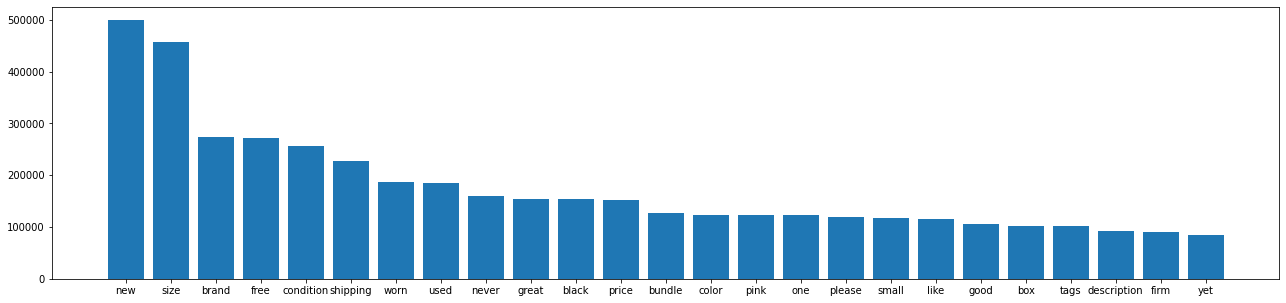

In [ ]:
word_count={}
for sentence in train['item_description'].values:
  for word in sentence.split(' '):
    if len(word)>=3:
      if word not in word_count:
        word_count[word]=1
      else:
        word_count[word]+=1

n_print=25
word_counter = Counter(word_count)
words=[]
counter=[]
for word, count in word_counter.most_common(n_print):
  words.append(word)
  counter.append(count)

f, ax = plt.subplots(figsize=(22,5))
plt.bar(words, counter)
plt.show()


In [ ]:
train

,train_id,name,item_condition_id,brand_name,price,shipping,item_description,main_category,subcat_1,subcat_2,description_wc
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Unknown,2.397895,1,description yet,Men,Tops,T-shirts,3
1,1,Razer BlackWidow Chroma Keyboard,3,Razer,3.970292,0,keyboard great condition works like came box p...,Electronics,Computers & Tablets,Components & Parts,36
2,2,AVA-VIV Blouse,1,Target,2.397895,1,adorable top hint lace key hole back pale pink...,Women,Tops & Blouses,Blouse,29
3,3,Leather Horse Statues,1,Unknown,3.583519,1,new tags leather horses retail stand foot high...,Home,Home Décor,Home Décor Accents,32
4,4,24K GOLD plated rose,1,Unknown,3.806662,0,complete certificate authenticity,Women,Jewelry,Necklaces,5
...,...,...,...,...,...,...,...,...,...,...,...
1482530,1482530,Free People Inspired Dress,2,Free People,3.044522,1,lace says size small fits medium perfectly nev...,Women,Dresses,Mid-Calf,22
1482531,1482531,Little mermaid handmade dress,2,Disney,2.708050,0,little mermaid handmade dress never worn size 2t,Kids,Girls 2T-5T,Dresses,8
1482532,1482532,21 day fix containers and eating plan,2,Unknown,2.564949,0,used twice still great shape,Sports & Outdoors,Exercise,Fitness accessories,8
1482533,1482533,World markets lanterns,3,Unknown,3.828641,1,2 one see 2 red 2 orange 2 big red orange ones...,Home,Home Décor,Home Décor Accents,28


In [ ]:
# reset product with price 0 train
print(train.shape)
train = train[train['price']>0].reset_index(drop=True)
print(train.shape)
# reset product with price 0 test
print(test.shape)
test = test[test['price']>0].reset_index(drop=True)
print(test.shape)

(1482535, 11)
(1481661, 11)


Sentiment analysis

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid_obj = SentimentIntensityAnalyzer()
def sentiment_analysis(sentence):
  sentiment_dict = sid_obj.polarity_scores(sentence)
  print(sentiment_dict)
  return (sentiment_dict['neg']*100, sentiment_dict['neu']*100, sentiment_dict['pos']*100, sentiment_dict['compound']*100) 

#train
train['negative'], train['neutral'], train['positive'], train['compound'] = zip(*train['item_description'].apply(lambda x: sentiment_analysis(x)))
train
#test
test['negative'], test['neutral'], test['positive'], test['compound'] = zip(*test['item_description'].apply(lambda x: sentiment_analysis(x)))
test

Streaming output truncated to the last 5000 lines.
{'neg': 0.0, 'neu': 0.539, 'pos': 0.461, 'compound': 0.7174}
{'neg': 0.0, 'neu': 0.882, 'pos': 0.118, 'compound': 0.0516}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.3612}
{'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'compound': 0.4404}
{'neg': 0.0, 'neu': 0.857, 'pos': 0.143, 'compound': 0.3612}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.179, 'neu': 0.43, 'pos': 0.391, 'compound': 0.7096}
{'neg': 0.0, 'neu': 0.903, 'pos': 0.097, 'compound': 0.6808}
{'neg': 0.177, 'neu': 0.497, 'pos': 0.326, 'compound': 0.8442}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.2, 'pos': 0.8, 'compound': 0.8402}
{'neg': 0.025, 'neu': 0.88, 'pos': 0.094, 'compound': 0.8271}
{'neg': 0.0, 'neu':

,train_id,name,item_condition_id,brand_name,price,shipping,item_description,main_category,subcat_1,subcat_2,description_wc,negative,neutral,positive
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Unknown,2.397895,1,description yet,Men,Tops,T-shirts,3,0.0,100.0,0.0
1,1,Razer BlackWidow Chroma Keyboard,3,Razer,3.970292,0,keyboard great condition works like came box p...,Electronics,Computers & Tablets,Components & Parts,36,0.0,58.1,41.9
2,2,AVA-VIV Blouse,1,Target,2.397895,1,adorable top hint lace key hole back pale pink...,Women,Tops & Blouses,Blouse,29,0.0,70.6,29.4
3,3,Leather Horse Statues,1,Unknown,3.583519,1,new tags leather horses retail stand foot high...,Home,Home Décor,Home Décor Accents,32,0.0,72.8,27.2
4,4,24K GOLD plated rose,1,Unknown,3.806662,0,complete certificate authenticity,Women,Jewelry,Necklaces,5,0.0,100.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1481656,1482530,Free People Inspired Dress,2,Free People,3.044522,1,lace says size small fits medium perfectly nev...,Women,Dresses,Mid-Calf,22,22.4,47.8,29.8
1481657,1482531,Little mermaid handmade dress,2,Disney,2.708050,0,little mermaid handmade dress never worn size 2t,Kids,Girls 2T-5T,Dresses,8,0.0,78.8,21.2
1481658,1482532,21 day fix containers and eating plan,2,Unknown,2.564949,0,used twice still great shape,Sports & Outdoors,Exercise,Fitness accessories,8,0.0,49.4,50.6
1481659,1482533,World markets lanterns,3,Unknown,3.828641,1,2 one see 2 red 2 orange 2 big red orange ones...,Home,Home Décor,Home Décor Accents,28,0.0,100.0,0.0


In [ ]:
def branded(name):
  if name=='Unknown':
    return 0
  else:
    return 1

#train
train['is_branded'] = train['brand_name'].apply(lambda x: branded(x))
train
#test
test['is_branded'] = test['brand_name'].apply(lambda x: branded(x))
test

,train_id,name,item_condition_id,brand_name,price,shipping,item_description,main_category,subcat_1,subcat_2,description_wc,negative,neutral,positive,is_branded
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Unknown,2.397895,1,description yet,Men,Tops,T-shirts,3,0.0,100.0,0.0,0
1,1,Razer BlackWidow Chroma Keyboard,3,Razer,3.970292,0,keyboard great condition works like came box p...,Electronics,Computers & Tablets,Components & Parts,36,0.0,58.1,41.9,1
2,2,AVA-VIV Blouse,1,Target,2.397895,1,adorable top hint lace key hole back pale pink...,Women,Tops & Blouses,Blouse,29,0.0,70.6,29.4,1
3,3,Leather Horse Statues,1,Unknown,3.583519,1,new tags leather horses retail stand foot high...,Home,Home Décor,Home Décor Accents,32,0.0,72.8,27.2,0
4,4,24K GOLD plated rose,1,Unknown,3.806662,0,complete certificate authenticity,Women,Jewelry,Necklaces,5,0.0,100.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1481656,1482530,Free People Inspired Dress,2,Free People,3.044522,1,lace says size small fits medium perfectly nev...,Women,Dresses,Mid-Calf,22,22.4,47.8,29.8,1
1481657,1482531,Little mermaid handmade dress,2,Disney,2.708050,0,little mermaid handmade dress never worn size 2t,Kids,Girls 2T-5T,Dresses,8,0.0,78.8,21.2,1
1481658,1482532,21 day fix containers and eating plan,2,Unknown,2.564949,0,used twice still great shape,Sports & Outdoors,Exercise,Fitness accessories,8,0.0,49.4,50.6,0
1481659,1482533,World markets lanterns,3,Unknown,3.828641,1,2 one see 2 red 2 orange 2 big red orange ones...,Home,Home Décor,Home Décor Accents,28,0.0,100.0,0.0,0


Vectorization of Categorical Features

In [ ]:
def one_hot_encode(train,test):
    '''
    Function to one hot encode the categorical columns
    '''
    vectorizer = CountVectorizer(token_pattern='.+')
    
   

    #vectorizing the main_category column
    vectorizer = vectorizer.fit(train['main_category'].values) # fit has to happen only on train data
    train['main_category'] = vectorizer.transform(train['main_category'].values)
    test['main_category'] = vectorizer.transform(test['main_category'].values)
    
    #vectorizing sub_cat_1 column
    vectorizer = vectorizer.fit(train['subcat_1'].values) # fit has to happen only on train data
    train['subcat_1'] = vectorizer.transform(train['subcat_1'].values)
    test['subcat_1'] = vectorizer.transform(test['subcat_1'].values)

    #vectorizing sub_cat_2 column
    vectorizer = vectorizer.fit(train['subcat_2'].values) # fit has to happen only on train data
    train['subcat_2'] = vectorizer.transform(train['subcat_2'].values)
    test['subcat_2'] = vectorizer.transform(test['subcat_2'].values)

    #vectorizing brand column
    vectorizer = vectorizer.fit(train['brand_name'].astype(str)) # fit has to happen only on train data
    train['brand_name'] = vectorizer.transform(train['brand_name'].astype(str))
    test['brand_name'] = vectorizer.transform(test['brand_name'].astype(str))
   
    print("created OHE columns for main_category,sub_cat_1,sub_cat_2,brand_name\n")

one_hot_encode(train, test)

Vectorization of Textual Features

In [ ]:
def vectorizer(train,test,column,no_of_features,n_range,vector_type):
    '''
    Function to vectorize text using TFIDF/BoW
    '''
    if str(vector_type) == 'bow':
        vectorizer = CountVectorizer(ngram_range=n_range,max_features=no_of_features).fit(train[column])  #fitting
    else:
        vectorizer = TfidfVectorizer(ngram_range=n_range, max_features=no_of_features).fit(train[column]) # fit has to happen only on train data
    
    # we use the fitted vectorizer to convert the text to vector
    transformed_text = vectorizer.transform(tqdm(test[column]))
    ###############################
    print("After vectorizations")
    print(transformed_text.shape)
    print("="*100)
    return transformed_text

In [ ]:
X_train_bow_name = vectorizer(X_train,X_train,'name',100000,(1,2),'bow')
X_test_bow_name = vectorizer(X_train,X_test,'name',100000,(1,2),'bow')
X_train_tfidf_desc = vectorizer(X_train,X_train,'item_description',100000,(1,3),'tfidf')
X_test_tfidf_desc = vectorizer(X_train,X_test,'item_description',100000,(1,3),'tfidf')

Handling Numerical Features

In [ ]:
normalizer=Normalizer().fit(np.array(train['positive']).reshape(-1,1))
positive_train=normalizer.transform(np.array(train['positive']).reshape(-1,1))
##test???
### da fare su attributi numerici

Binary Features & item_condition_id

In [ ]:
features_train = csr_matrix(pd.get_dummies(train_data[['item_condition_id', 'shipping', 'is_branded']]))

feature matrix

In [ ]:
x_train_set = hstack((X_train_bow_name,X_train_tfidf_desc,tr_cat,X_train['wc_name'].values.reshape(-1,1),X_train['wc_desc'].values.reshape(-1,1))).tocsr()
x_test_set = hstack((X_test_bow_name,X_test_tfidf_desc,te_cat,X_test['wc_name'].values.reshape(-1,1),X_test['wc_desc'].values.reshape(-1,1))).tocsr()
view raw